# Handle Inconsistence Data

*In this Notebook, We will handle inconsistence data using Multiple methods of ML using Python Language*

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
local_data = {
    'date': ['2025-01-10', '2025-02-15', '2025-03-17', '2025-04-18', '2025-07-15', '2025-07-15'],
    'country': ['USA','UK','AMERICA', 'AUSTRIA', 'JAPAN', 'CHINA'],
    'name': ['MABTOOR', 'MUNEEB', 'MANSOOR', 'MOIZ', 'ALI', 'ASAD'],
    'sales_2025': [1000,2000,None, 3000, None,4000],
    'sales_2024': [1200,4000,5600,None,None, 6433]
}

In [7]:
local_data

{'date': ['2025-01-10',
  '2025-02-15',
  '2025-03-17',
  '2025-04-18',
  '2025-07-15',
  '2025-07-15'],
 'country': ['USA', 'UK', 'AMERICA', 'AUSTRIA', 'JAPAN', 'CHINA'],
 'name': ['MABTOOR', 'MUNEEB', 'MANSOOR', 'MOIZ', 'ALI', 'ASAD'],
 'sales_2025': [1000, 2000, None, 3000, None, 4000],
 'sales_2024': [1200, 4000, 5600, None, None, 6433]}

In [11]:
# Convert it into Dataframe
data_frame = pd.DataFrame(local_data)
data_frame.head()

,date,country,name,sales_2025,sales_2024
0,2025-01-10,USA,MABTOOR,1000.0,1200.0
1,2025-02-15,UK,MUNEEB,2000.0,4000.0
2,2025-03-17,AMERICA,MANSOOR,NaN,5600.0
3,2025-04-18,AUSTRIA,MOIZ,3000.0,NaN
4,2025-07-15,JAPAN,ALI,NaN,NaN


In [12]:
data_frame.head()

,date,country,name,sales_2025,sales_2024
0,2025-01-10,USA,MABTOOR,1000.0,1200.0
1,2025-02-15,UK,MUNEEB,2000.0,4000.0
2,2025-03-17,AMERICA,MANSOOR,NaN,5600.0
3,2025-04-18,AUSTRIA,MOIZ,3000.0,NaN
4,2025-07-15,JAPAN,ALI,NaN,NaN


In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        6 non-null      object 
 1   country     6 non-null      object 
 2   name        6 non-null      object 
 3   sales_2025  4 non-null      float64
 4   sales_2024  4 non-null      float64
dtypes: float64(2), object(3)
memory usage: 372.0+ bytes


In [14]:
data_frame.describe()

,sales_2025,sales_2024
count,4.000000,4.000000
mean,2500.000000,4308.250000
std,1290.994449,2305.024711
min,1000.000000,1200.000000
25%,1750.000000,3300.000000
50%,2500.000000,4800.000000
75%,3250.000000,5808.250000
max,4000.000000,6433.000000


In [15]:
data_frame.isnull().sum()

date          0
country       0
name          0
sales_2025    2
sales_2024    2
dtype: int64

In [16]:
# Impute Missing values of sales data

data_frame['sales_2025'].fillna(data_frame['sales_2025'].mean(), inplace=True)
data_frame['sales_2024'].fillna(data_frame['sales_2024'].mean(), inplace=True)

data_frame


C:\Users\Mabtoor Mabx\AppData\Local\Temp\ipykernel_12100\1370798287.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['sales_2025'].fillna(data_frame['sales_2025'].mean(), inplace=True)
C:\Users\Mabtoor Mabx\AppData\Local\Temp\ipykernel_12100\1370798287.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

,date,country,name,sales_2025,sales_2024
0,2025-01-10,USA,MABTOOR,1000.0,1200.00
1,2025-02-15,UK,MUNEEB,2000.0,4000.00
2,2025-03-17,AMERICA,MANSOOR,2500.0,5600.00
3,2025-04-18,AUSTRIA,MOIZ,3000.0,4308.25
4,2025-07-15,JAPAN,ALI,2500.0,4308.25
5,2025-07-15,CHINA,ASAD,4000.0,6433.00


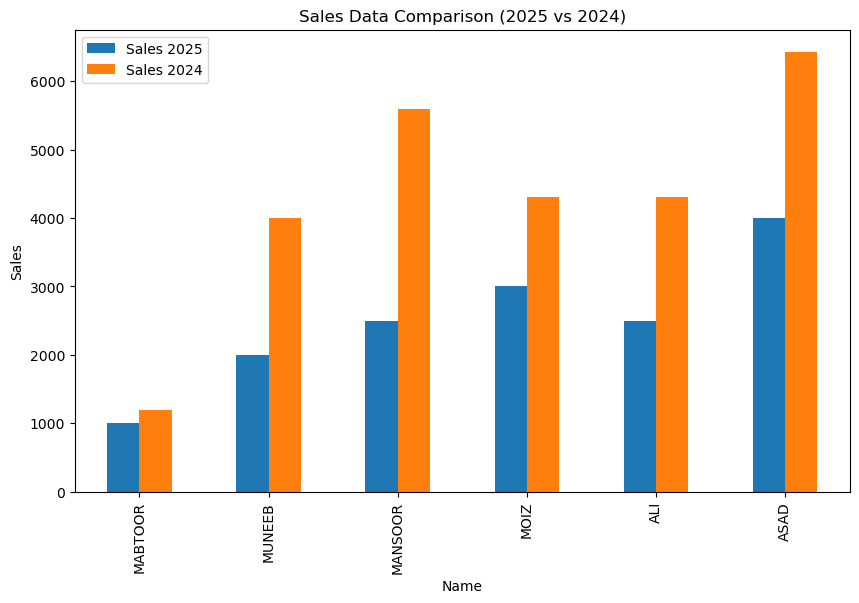

In [17]:
# Generate a bar plot for sales data comparison
data_frame.plot(x='name', y=['sales_2025', 'sales_2024'], kind='bar', figsize=(10, 6))
plt.title('Sales Data Comparison (2025 vs 2024)')
plt.xlabel('Name')
plt.ylabel('Sales')
plt.legend(['Sales 2025', 'Sales 2024'])
plt.show()

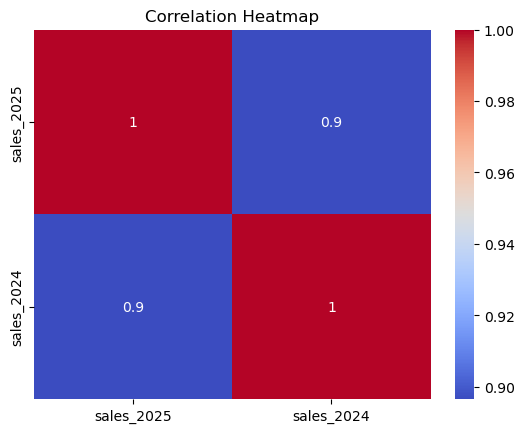

In [19]:
# Select only numeric columns for correlation
numeric_data = data_frame.select_dtypes(include=['float64', 'int64'])

# Generate the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Another Case for Impute Missing Value

*Another case of solving missing values using different techniques*

In [20]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 0, 'Region')

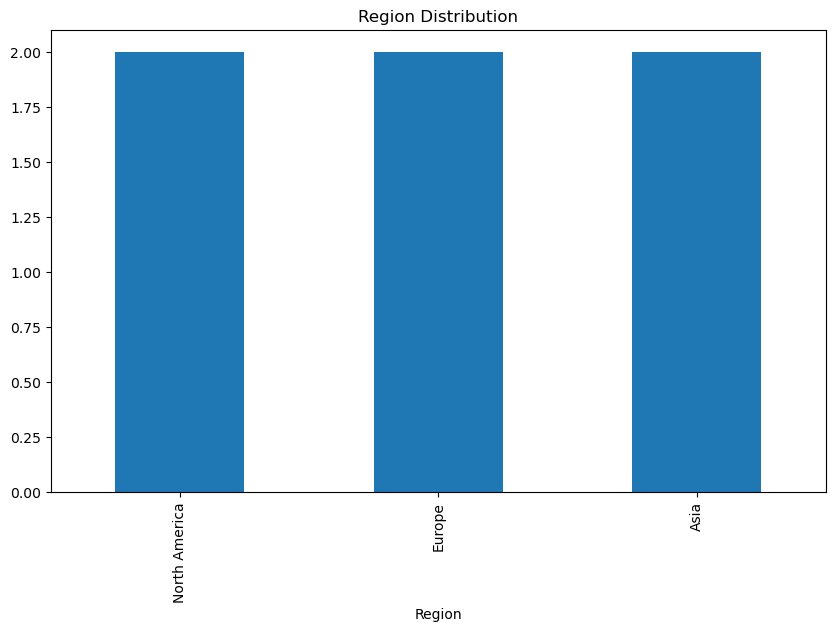

In [21]:
# load the dataset
country_mapping = {
    'USA': 'North America',
    'UK': 'Europe',
    'AMERICA': 'North America',
    'AUSTRIA': 'Europe',
    'JAPAN': 'Asia',
    'CHINA': 'Asia'
}
data_frame['region'] = data_frame['country'].map(country_mapping)
data_frame['region'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Region Distribution')
plt.xlabel('Region')

In [22]:
data_frame.isnull().sum()

date          0
country       0
name          0
sales_2025    0
sales_2024    0
region        0
dtype: int64